<center> <font size=6> Predict Breast Cancer </font></center>

The dataset was re-calibrated with synthetic data. The original dataset has 357 instances of "Benign(B)" cases and 212 instances of "Malignant(M)" cases. I extracted the 212 instances of "Malignant(M)" cases and fed them to a synthetic data generator and obtained 357 rows of mixed synthetic and original data. As a result, the re-calibrated dataset consists of 50% "Benign(B)" instances and 50% "Malignant(M)" instances.

In [1]:
import pandas as pd
df=pd.read_csv("breast_cancer.csv")
df

,class,cell1_radius,cell1_texture,cell1_perimeter,cell1_area,cell1_smoothness,cell1_compactness,cell1_concavity,cell1_concave_pts,cell1_symmetry,...,cell3_radius,cell3_texture,cell3_perimeter,cell3_area,cell3_smoothness,cell3_compactness,cell3_concavity,cell3_concave_pts,cell3_symmetry,cell3_fractal_dim
0,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,M,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.064630,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550
710,M,17.470,24.68,116.10,984.6,0.10490,0.16030,0.21590,0.104300,0.1538,...,23.140,32.33,155.30,1660.0,0.13760,0.38300,0.48900,0.17210,0.2160,0.09300
711,M,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.073640,0.2303,...,17.460,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410
712,M,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.086320,0.1769,...,29.170,35.59,188.00,2615.0,0.14010,0.26000,0.31550,0.20090,0.2822,0.07526


In [2]:
X=df.drop(["class"],axis=1)
X.head()

,cell1_radius,cell1_texture,cell1_perimeter,cell1_area,cell1_smoothness,cell1_compactness,cell1_concavity,cell1_concave_pts,cell1_symmetry,cell1_fractal_dim,...,cell3_radius,cell3_texture,cell3_perimeter,cell3_area,cell3_smoothness,cell3_compactness,cell3_concavity,cell3_concave_pts,cell3_symmetry,cell3_fractal_dim
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [3]:
y=df[["class"]]
y.head()

,class
0,B
1,B
2,B
3,B
4,B


In [4]:
print(len(y[y["class"]=="M"]))
print(len(y[y["class"]=="B"]))

357
357


In [5]:
X.isnull().values.any()

False

In [6]:
from sklearn import preprocessing
names=X.columns
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=names)
X.head()

,cell1_radius,cell1_texture,cell1_perimeter,cell1_area,cell1_smoothness,cell1_compactness,cell1_concavity,cell1_concave_pts,cell1_symmetry,cell1_fractal_dim,...,cell3_radius,cell3_texture,cell3_perimeter,cell3_area,cell3_smoothness,cell3_compactness,cell3_concavity,cell3_concave_pts,cell3_symmetry,cell3_fractal_dim
0,-0.360072,-1.264927,-0.381382,-0.426627,0.022831,-0.576848,-0.446315,-0.225914,0.150351,-0.732114,...,-0.436012,-1.162689,-0.423892,-0.469216,0.402377,-0.617000,-0.334479,-0.004707,0.013169,-0.712116
1,-0.483376,-0.957846,-0.452320,-0.548407,0.723446,0.218043,-0.692069,-0.637586,0.431346,0.732165,...,-0.552785,-0.969173,-0.523125,-0.596704,-0.159088,-0.046450,-0.556531,-0.812483,0.323431,-0.224422
2,-1.441930,-1.701663,-1.432656,-1.195708,0.355461,-0.861520,-0.881074,-0.892324,-0.089523,0.863880,...,-1.370200,-1.729078,-1.374169,-1.095281,-0.106450,-0.972527,-1.002102,-0.964889,-0.776728,-0.440823
3,-0.496778,-0.341411,-0.569387,-0.538412,-0.551515,-1.335567,-0.927270,-0.683655,-1.282039,-0.596195,...,-0.782504,-0.604167,-0.842816,-0.730353,-1.658812,-1.362811,-1.181254,-1.140097,-1.470697,-1.287425
4,-1.792542,-0.700809,-1.767187,-1.385085,-0.827865,-0.956990,-1.041471,-1.258000,-0.247155,0.300588,...,-1.612553,-0.737898,-1.590503,-1.210131,-0.224884,-0.853639,-1.090345,-1.493544,0.205022,-0.632945


In [7]:
n_samples=y.shape[0]
import numpy as np
y=np.asarray(y).reshape(n_samples,)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold


estimator=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
features=RFECV(estimator,step=1,cv=StratifiedKFold(8),scoring="accuracy")
features.fit(X, y)

print("Optimal number of features : %d" % features.n_features_)

Optimal number of features : 17


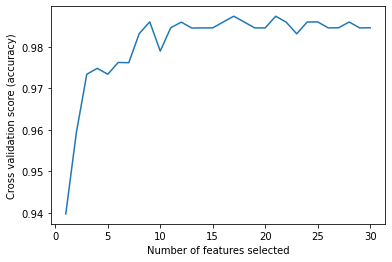

In [11]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

In [12]:
from sklearn.feature_selection import RFE
selector = RFE(estimator, n_features_to_select=features.n_features_, step=1)
selector = selector.fit(X, y)
selector=pd.DataFrame(selector.ranking_).rename(columns={0:"Importance"})
selector.head()

,Importance
0,1
1,1
2,1
3,1
4,4


In [13]:
features=selector[selector["Importance"]==1]
features.head()

,Importance
0,1
1,1
2,1
3,1
5,1


In [14]:
X=X.iloc[:,features.index]
X.head()

,cell1_radius,cell1_texture,cell1_perimeter,cell1_area,cell1_compactness,cell1_concavity,cell1_concave_pts,cell2_area,cell3_radius,cell3_texture,cell3_perimeter,cell3_area,cell3_smoothness,cell3_compactness,cell3_concavity,cell3_concave_pts,cell3_symmetry
0,-0.360072,-1.264927,-0.381382,-0.426627,-0.576848,-0.446315,-0.225914,-0.464626,-0.436012,-1.162689,-0.423892,-0.469216,0.402377,-0.617000,-0.334479,-0.004707,0.013169
1,-0.483376,-0.957846,-0.452320,-0.548407,0.218043,-0.692069,-0.637586,-0.634762,-0.552785,-0.969173,-0.523125,-0.596704,-0.159088,-0.046450,-0.556531,-0.812483,0.323431
2,-1.441930,-1.701663,-1.432656,-1.195708,-0.861520,-0.881074,-0.892324,-0.615050,-1.370200,-1.729078,-1.374169,-1.095281,-0.106450,-0.972527,-1.002102,-0.964889,-0.776728
3,-0.496778,-0.341411,-0.569387,-0.538412,-1.335567,-0.927270,-0.683655,-0.644522,-0.782504,-0.604167,-0.842816,-0.730353,-1.658812,-1.362811,-1.181254,-1.140097,-1.470697
4,-1.792542,-0.700809,-1.767187,-1.385085,-0.956990,-1.041471,-1.258000,-0.758488,-1.612553,-0.737898,-1.590503,-1.210131,-0.224884,-0.853639,-1.090345,-1.493544,0.205022


In [15]:
y=pd.DataFrame(y.T).rename(columns={0:"class"})
y.head()

,class
0,B
1,B
2,B
3,B
4,B


In [16]:
from sklearn.preprocessing import OneHotEncoder
ienc=OneHotEncoder(handle_unknown="ignore")
y=ienc.fit_transform(y)
y=pd.DataFrame(y.toarray())
y.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.14,random_state=42)
print(X_train.shape)
print(X_test.shape)

(614, 17)
(100, 17)


In [157]:
length=X_train.shape[1]
num_classes=y_test.shape[1]

In [158]:
# Load the libraries
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(55, activation='relu'))
    model.add(Dense(55,activation="relu"))
    model.add(Dense(55,activation="relu"))
    model.add(Dense(55, activation ="relu"))
    model.add(Dense(55, activation="relu"))
    model.add(Dense(55,activation="tanh"))
    model.add(Dense(num_classes, activation='softmax'))
    opt=Adam(lr=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [161]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=50, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 614 samples, validate on 100 samples
Epoch 1/50
 - 9s - loss: 0.5172 - acc: 0.7915 - val_loss: 0.2490 - val_acc: 0.9000
Epoch 2/50
 - 0s - loss: 0.1575 - acc: 0.9397 - val_loss: 0.1131 - val_acc: 0.9700
Epoch 3/50
 - 0s - loss: 0.0890 - acc: 0.9642 - val_loss: 0.0806 - val_acc: 0.9800
Epoch 4/50
 - 0s - loss: 0.0626 - acc: 0.9756 - val_loss: 0.0627 - val_acc: 0.9900
Epoch 5/50
 - 0s - loss: 0.0515 - acc: 0.9788 - val_loss: 0.0563 - val_acc: 0.9800
Epoch 6/50
 - 0s - loss: 0.0474 - acc: 0.9837 - val_loss: 0.0455 - val_acc: 0.9800
Epoch 7/50
 - 0s - loss: 0.0377 - acc: 0.9902 - val_loss: 0.0484 - val_acc: 0.9800
Epoch 8/50
 - 0s - loss: 0.0286 - acc: 0.9902 - val_loss: 0.0599 - val_acc: 0.9900
Epoch 9/50
 - 0s - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0393 - val_acc: 0.9800
Epoch 10/50
 - 0s - loss: 0.0189 - acc: 0.9935 - val_loss: 0.0404 - val_acc: 0.9700
Epoch 11/50
 - 0s - loss: 0.0157 - acc: 0.9967 - val_loss: 0.0322 - val_acc: 0.9700
Epoch 12/50
 - 1s - loss: 0.0066 - acc:

[0.0027498682876466772, 1.0]

**Finally, 100% accuracy on both train and test data.**